In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from crossword_generator.grid import Grid

n = 21

def analyze(file_name, title):
    lengths = []
    num_entries = []
    num_length_3 = []
    num_length_n = []
    num_puzzles = 0
    with open(file_name, 'r') as f:
        line = 'temp'
        while line:
            g = Grid(n, generate_layout=False)
            num_puzzles += 1
            for i in range(n):
                line = f.readline().strip().replace(' ', '')
                if len(line) != n:
                    break
                for j in range(n):
                    g.cell(i + 1, j + 1).label = line[j]
            g.number_cells()
            lengths.extend([e.length for e in g.entries])
            num_entries.append(len(g.entries))
            num_length_3.append(sum(e.length==3 for e in g.entries))
            num_length_n.append(sum(e.length==n for e in g.entries))
            line = f.readline()

            # analysis of unique entry lengths
            entry_lengths = np.array([e.length for e in g.entries])
            unique, counts = np.unique(entry_lengths, return_counts=True)
            print(f"n = {n}")
            print(g)
            print(np.asarray((unique, counts)).T)

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(lengths), bins=range(3, 22))
    ax.set_title(f'{title}, clue lengths, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(num_entries))
    ax.set_title(f'{title}, number of entries, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(num_length_3))
    ax.set_title(f'{title}, number of entries with length 3, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(num_length_n))
    ax.set_title(f'{title}, number of entries with length {n}, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

n = 21
A L A N W # # C A R P E # # C L A D C A D
D E L I A # S A Q U O N # C R A N I A T E
S T O P T H E M U S I C # I M B A T M A N
# T N S # O L E A # S E R T # # B D E # #
B E E # C R I # R A S # B O A T Y A R D #
R R A T I N G # T R O T S # N O S H O E S
A S L A T E # M E S N E # # O P S # N P R
S P O R T Y C A R # # C A N I D # A C R A
S A N T E # S S T # # # C Y N O S U R E S
E C E # # # E C O N O M I S T G A M E S #
S E A # C A Y # F A R E S # M S S # M S T
# P L E A S E M R P L E A S E # # # O E O
D E L E G A T E E # # # N A N # S A N D L
E R A S # S O R E D # # D I T T O M A R K
A I L # A E E # # E C I G S # A N D R E I
C O L D L A Y # B A L S A # I S O T O P E
# D A B B L E R S # A U L # L T S # M O N
# # L A E # # E N C S # A D I E # B A R #
G O O D D E A L # A P P T O V E D A N T A
O W N G O A L S # R E C E D E # A R C E L
A S E E S A W # # S R T A S # # V I E R S
[[ 3 51]
 [ 4 20]
 [ 5 19]
 [ 6  8]
 [ 7 14]
 [ 8  6]
 [ 9  4]
 [10  2]
 [12  2]
 [14  4]
 [17  2]
 [21  2]]
n 

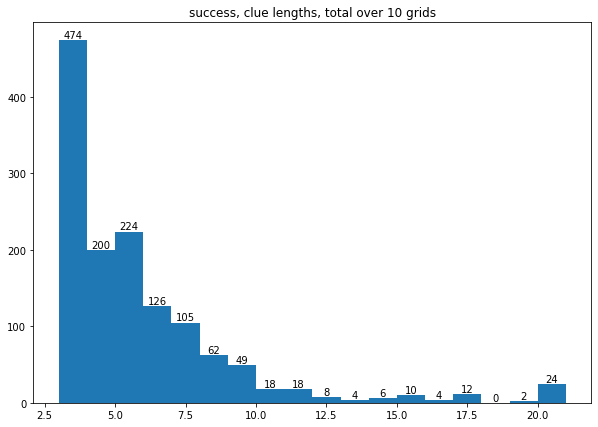

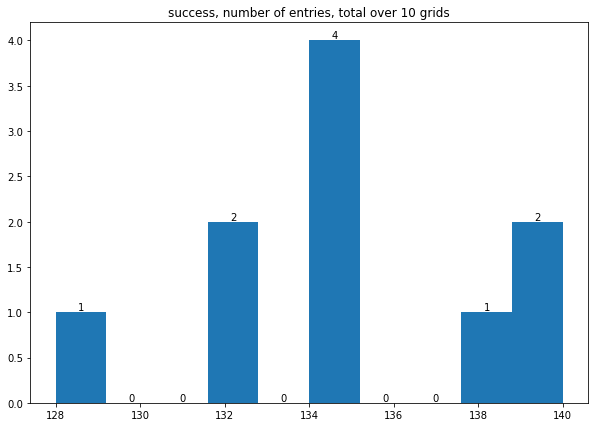

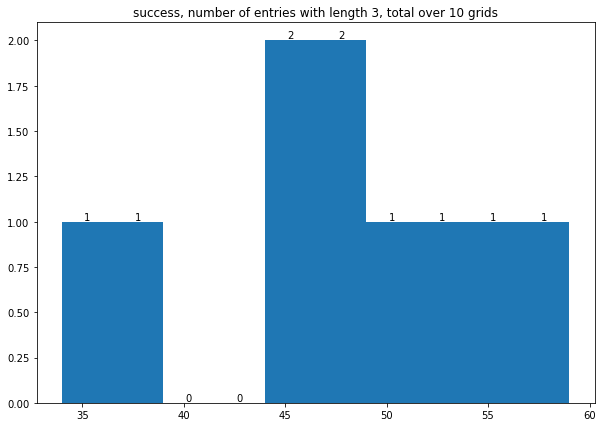

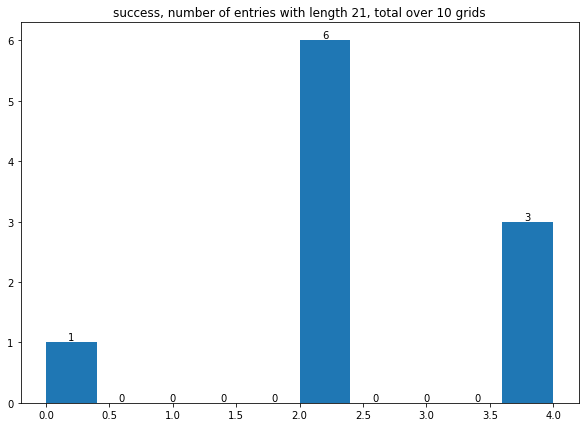

In [7]:
analyze(os.path.join(module_path, 'tests/results/21x21.txt'), 'success')

n = 21
. . . . . . . # . . . . . # # . . . . . #
. . . . . . . # . . . . . . . . . . . . #
. . . . . . . . . . . . . . . . . . . . #
# # . . . . . . . . . # # . . . . # . . .
. . . . . . # . . . . . . . # # . . . . .
. . . . . . # . . . # . . . . . . . . . .
. . . . . # . . . . # . . . . . # . . . #
# # . . . . . # . . . . # . . . # . . . .
# . . . . . . # # . . . # # . . . # . . .
. . . # # . . . . # . . . . . . . # . . .
. . . # . . . . . . . . . . . . . # . . .
. . . # . . . . . . . # . . . . # # . . .
. . . # . . . # # . . . # # . . . . . . #
. . . . # . . . # . . . . # . . . . . # #
# . . . # . . . . . # . . . . # . . . . .
. . . . . . . . . . # . . . # . . . . . .
. . . . . # # . . . . . . . # . . . . . .
. . . # . . . . # # . . . . . . . . . # #
# . . . . . . . . . . . . . . . . . . . .
# . . . . . . . . . . . . # . . . . . . .
# . . . . . # # . . . . . # . . . . . . .
[[ 3 46]
 [ 4 16]
 [ 5 18]
 [ 6 10]
 [ 7 13]
 [ 8  2]
 [ 9 10]
 [10  4]
 [12  2]
 [13  3]
 [20  2]
 [21  2]]
n 

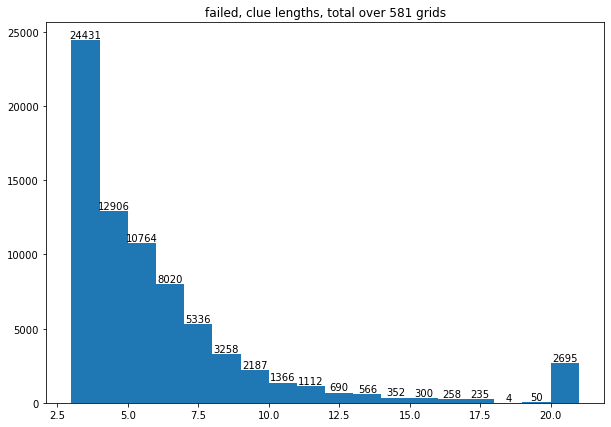

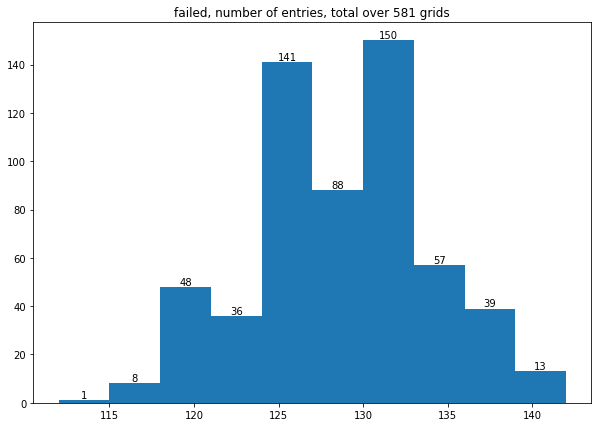

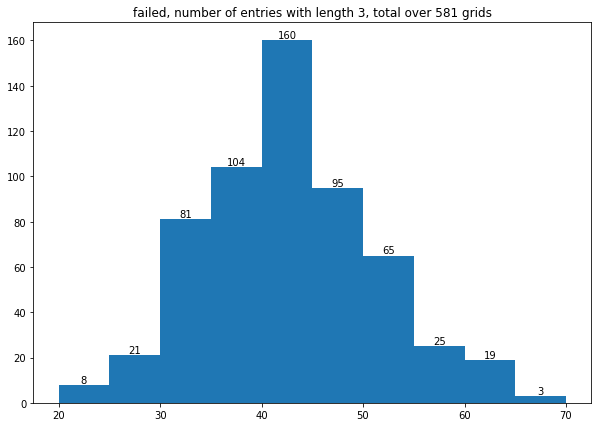

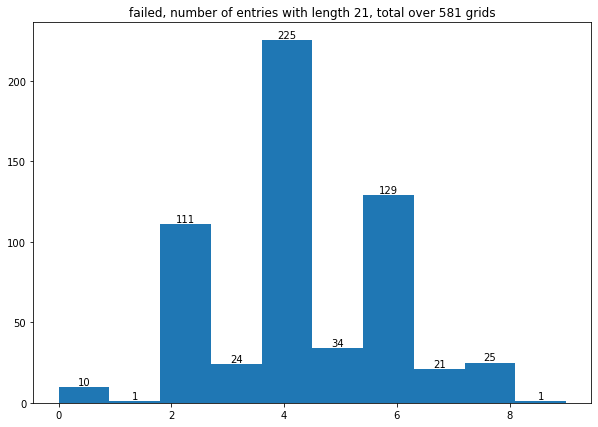

In [4]:
analyze(os.path.join(module_path, 'tests/results/21x21_failed.txt'), 'failed')